<a href="https://colab.research.google.com/github/luiza-mattoso/Pequenos-Projetos-DS/blob/master/Enfrente_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WORDCLOUD<br/>**
Aproveitando o lançamento da nova música do [Luiz Vilhena](https://www.instagram.com/luizvilhenaoficial/?hl=pt-br), chamada ENFRENTE, resolvi criar uma WordCloud com a letra da música.<br/>


Ouça a música na sua plataforma preferida: https://sl.onerpm.com/1543660723?_ga=2.102940096.1195352509.1597922591-2014652533.1577995498


---



Importando as blibiotecas

In [1]:
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from PIL import Image
import numpy as np

#!pip install wordcloud
from wordcloud import WordCloud, ImageColorGenerator

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Importando a Letra da Música e alocando no DF

In [2]:
df = pd.read_csv('Enfrente_vilhena.csv',sep = ';')
df.head()

,Enfrente
0,O meu destino é imprevisível
1,"Pra onde eu vou, nem eu sei"
2,O meu lugar é discutível (uhum)
3,Comigo mesmo e mais ninguém
4,Ainda tenho combustível


Tratamento do Texto

In [3]:
import re

newline = lambda x: re.sub('\n', ' ', x) # remove \n
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x) # remove alphanumeric words
punctuation = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
lower = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())

df['Enfrente'] = df.Enfrente.map(newline).map(alphanumeric).map(punctuation).map(lower)
df.head()

,Enfrente
0,o meu destino é imprevisível
1,pra onde eu vou nem eu sei
2,o meu lugar é discutível uhum
3,comigo mesmo e mais ninguém
4,ainda tenho combustível


Tokenização

In [4]:
df['tokens'] = df.Enfrente.map(word_tokenize)
df.head()

,Enfrente,tokens
0,o meu destino é imprevisível,"[o, meu, destino, é, imprevisível]"
1,pra onde eu vou nem eu sei,"[pra, onde, eu, vou, nem, eu, sei]"
2,o meu lugar é discutível uhum,"[o, meu, lugar, é, discutível, uhum]"
3,comigo mesmo e mais ninguém,"[comigo, mesmo, e, mais, ninguém]"
4,ainda tenho combustível,"[ainda, tenho, combustível]"


Definindo Stopwords

In [5]:
stop_words = stopwords.words('portuguese')
more_stop_words = ['pra','mim','uhum']
stop_words.extend(more_stop_words)
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

Removendo Stopwords

In [6]:
remove_stop_words = lambda token: [palavra for palavra in token if palavra not in stop_words]
df['tokens_stop_words'] = df.tokens.apply(remove_stop_words)
df.head()

,Enfrente,tokens,tokens_stop_words
0,o meu destino é imprevisível,"[o, meu, destino, é, imprevisível]","[destino, imprevisível]"
1,pra onde eu vou nem eu sei,"[pra, onde, eu, vou, nem, eu, sei]","[onde, vou, sei]"
2,o meu lugar é discutível uhum,"[o, meu, lugar, é, discutível, uhum]","[lugar, discutível]"
3,comigo mesmo e mais ninguém,"[comigo, mesmo, e, mais, ninguém]","[comigo, ninguém]"
4,ainda tenho combustível,"[ainda, tenho, combustível]","[ainda, combustível]"


Bag of Words

In [7]:
lista_de_palvras = sum(df.tokens_stop_words.tolist(), [])

In [8]:
lista_de_palvras[0:5]

['destino', 'imprevisível', 'onde', 'vou', 'sei']

In [9]:
df_enfrente = pd.DataFrame(lista_de_palvras, columns = ['enfrente'])

In [10]:
df_enfrente.head()

,enfrente
0,destino
1,imprevisível
2,onde
3,vou
4,sei


In [11]:
df_enfrente['enfrente'].value_counts()

esperar         6
tempo           4
destino         4
logica          3
faça            3
resolva         3
mágica          3
pena            3
adianta         3
sinta           3
diminua         3
vou             2
sei             2
lugar           2
ninguém         1
ainda           1
vontade         1
onde            1
fizeram         1
achei           1
irredutível     1
imprevisível    1
bem             1
tudo            1
porque          1
comigo          1
faz             1
rodar           1
resolver        1
combustível     1
atrás           1
aqui            1
aprendi         1
movimentar      1
discutível      1
ficar           1
Name: enfrente, dtype: int64

Criação das Wordclouds

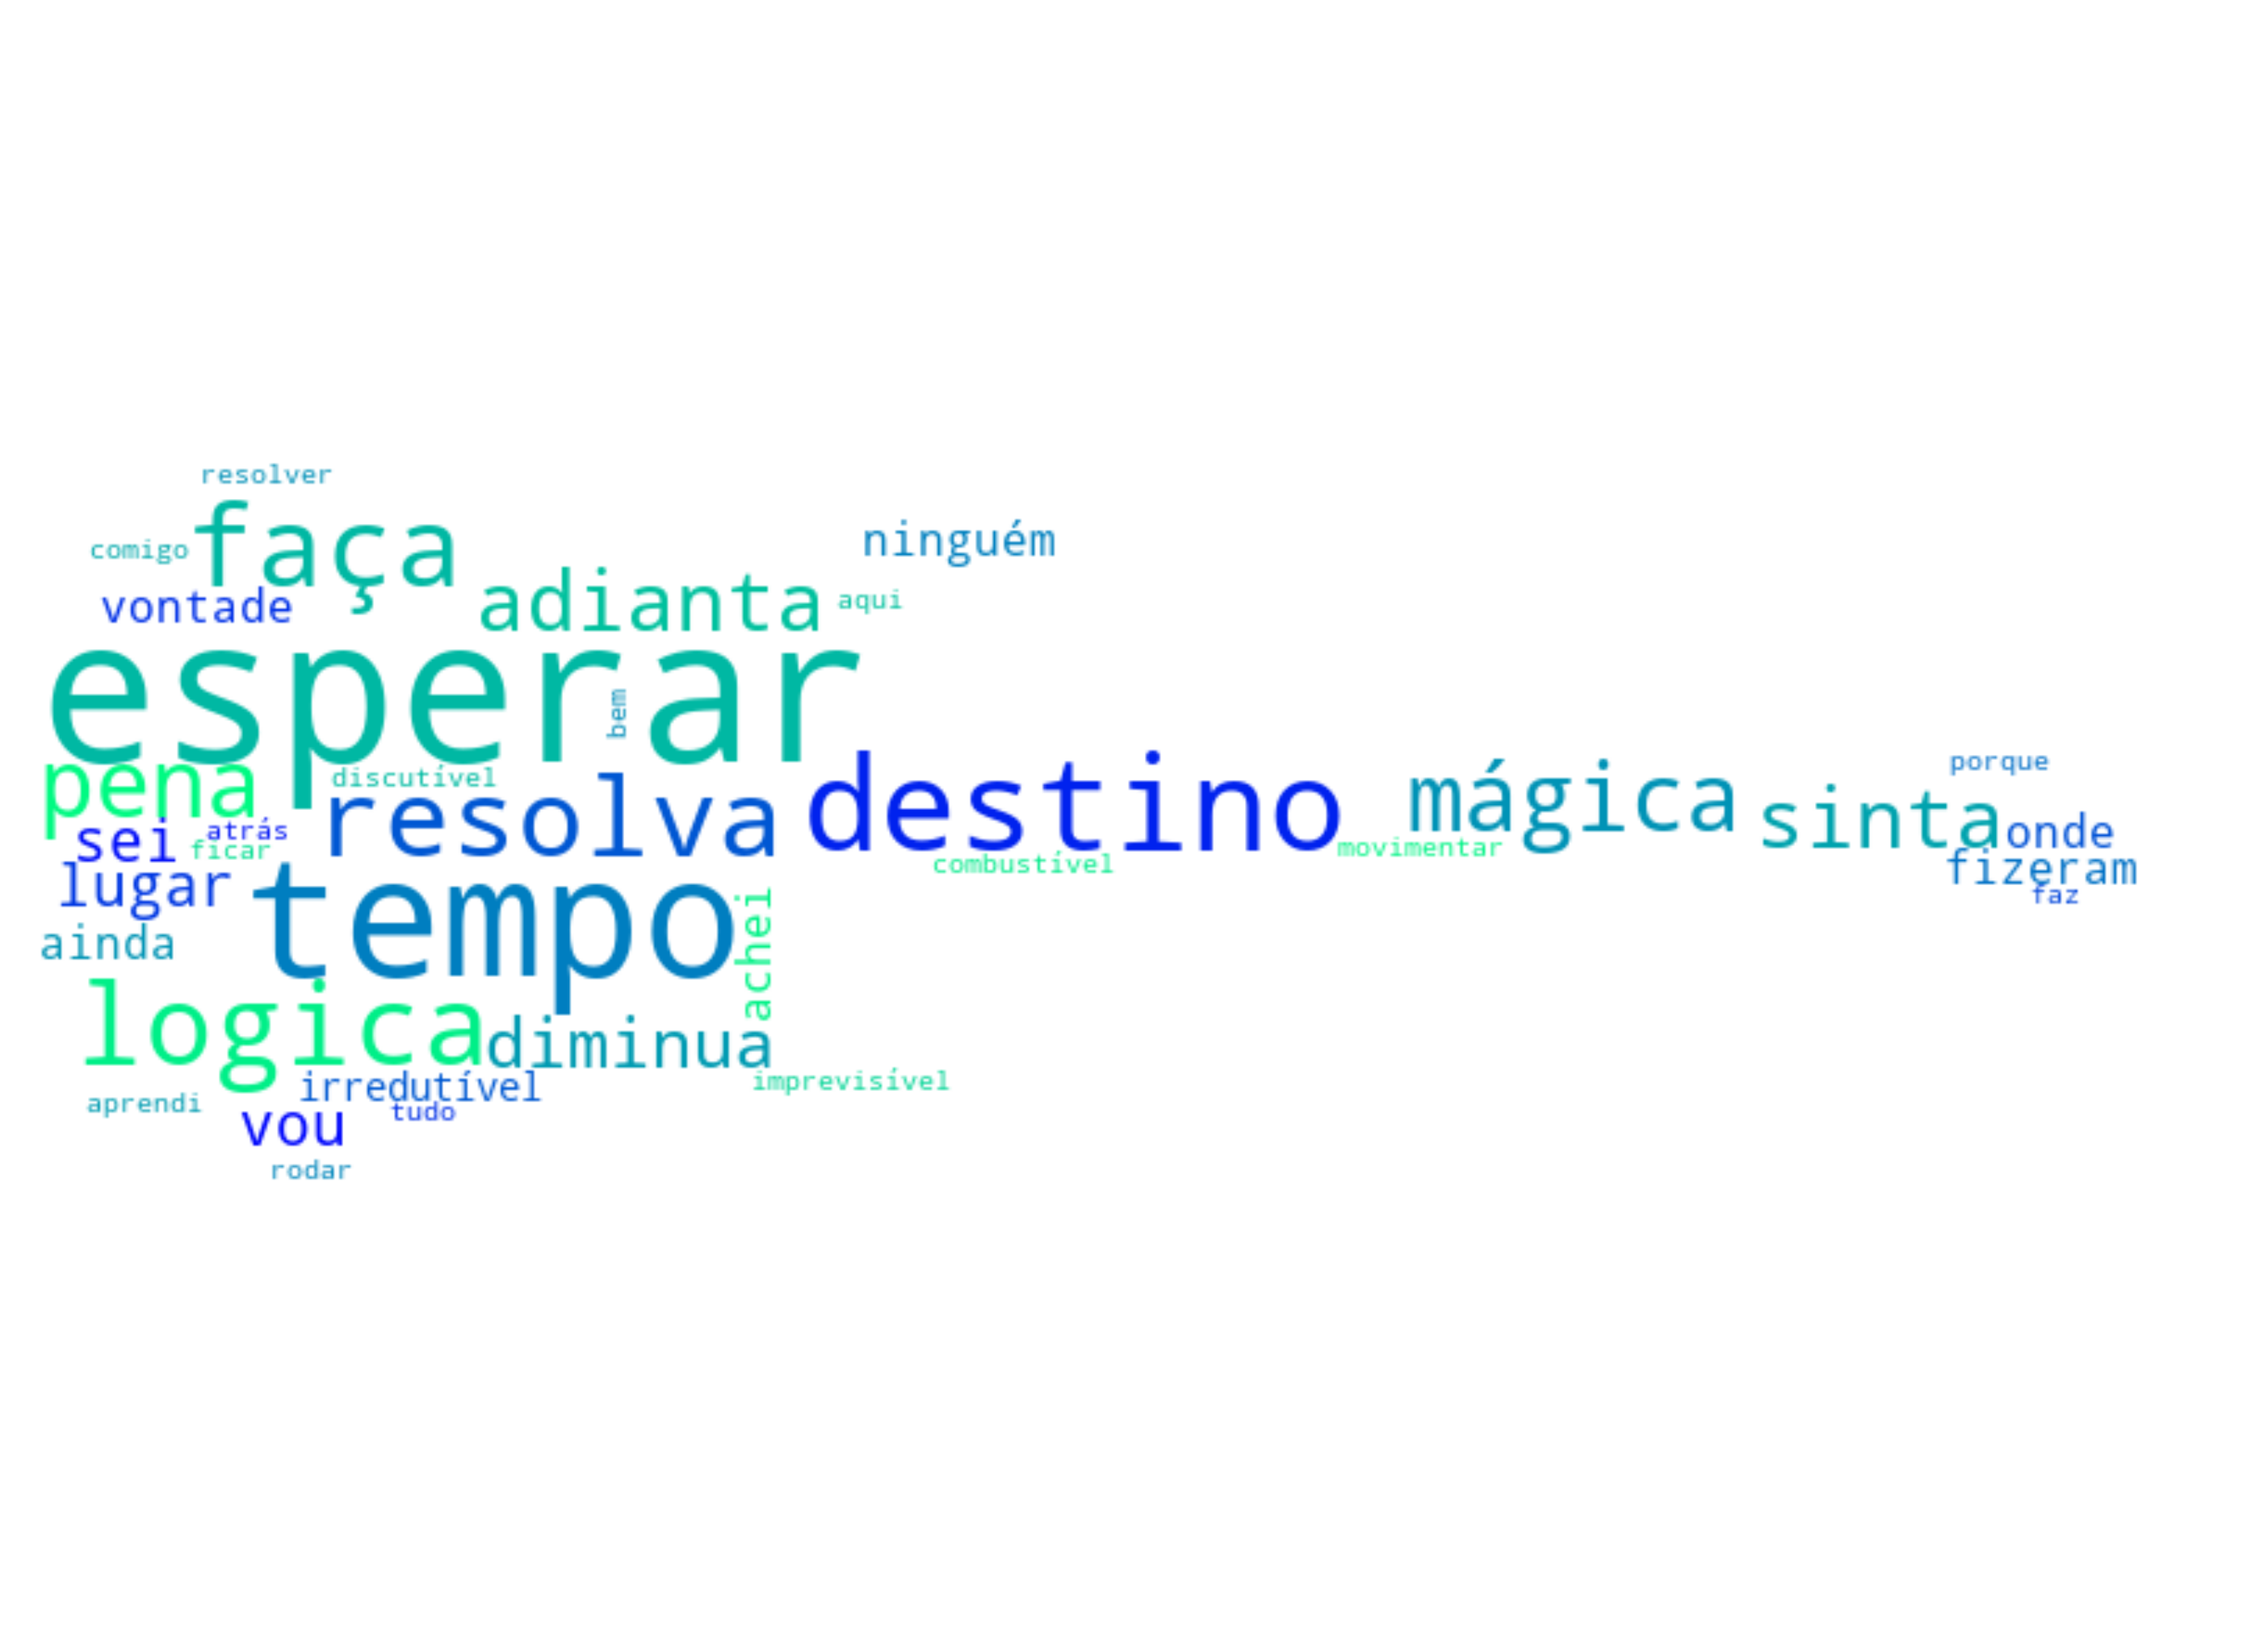

In [12]:
mask = np.array(Image.open("guitarra2.jpg"))
wordcloud = WordCloud(max_font_size=500, background_color="white", mask=mask,colormap='winter').fit_words(df_enfrente['enfrente'].value_counts())
plt.figure(figsize=(50,50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
image_colors = ImageColorGenerator(mask)
# store to file
#plt.savefig("enfrente_guitarra.png", format="png")
plt.show()

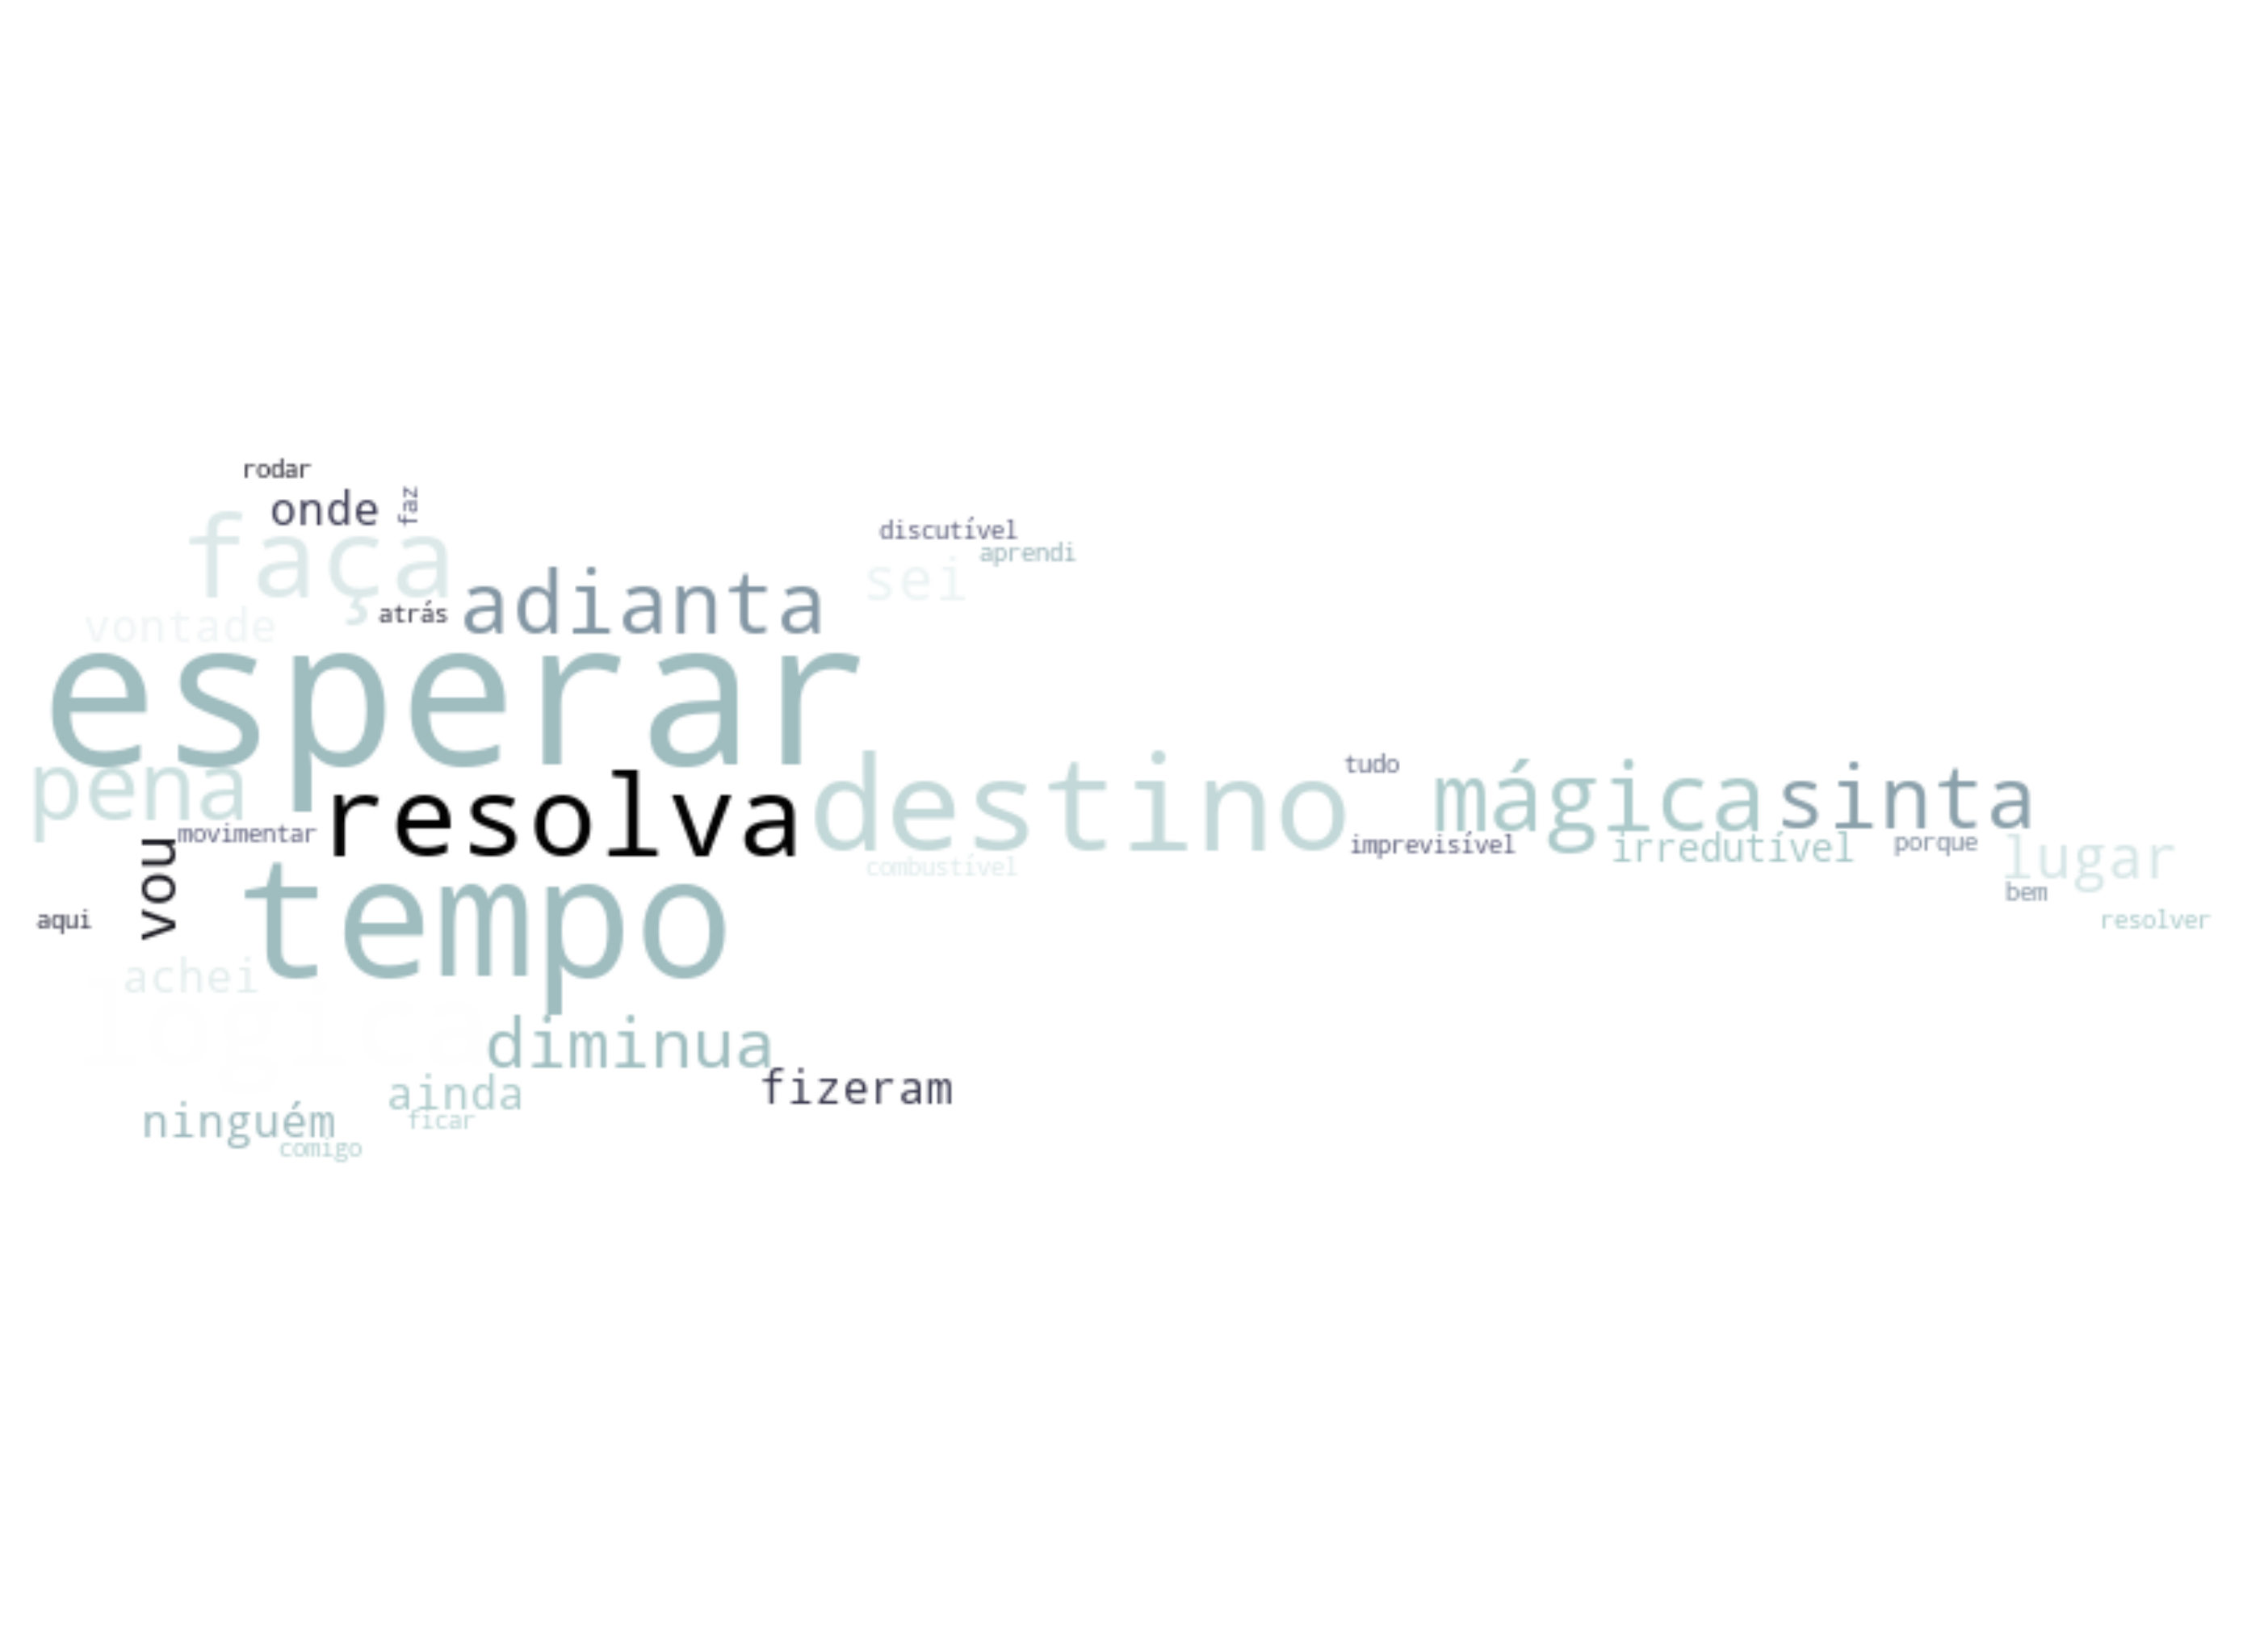

In [13]:
mask = np.array(Image.open("guitarra2.jpg"))
wordcloud2 = WordCloud(max_font_size=500, background_color="white", mask=mask,colormap='bone').fit_words(df_enfrente['enfrente'].value_counts())
plt.figure(figsize=(50,50))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
image_colors = ImageColorGenerator(mask)
# store to file
#plt.savefig("enfrente_guitarra2.png", format="png")
plt.show()

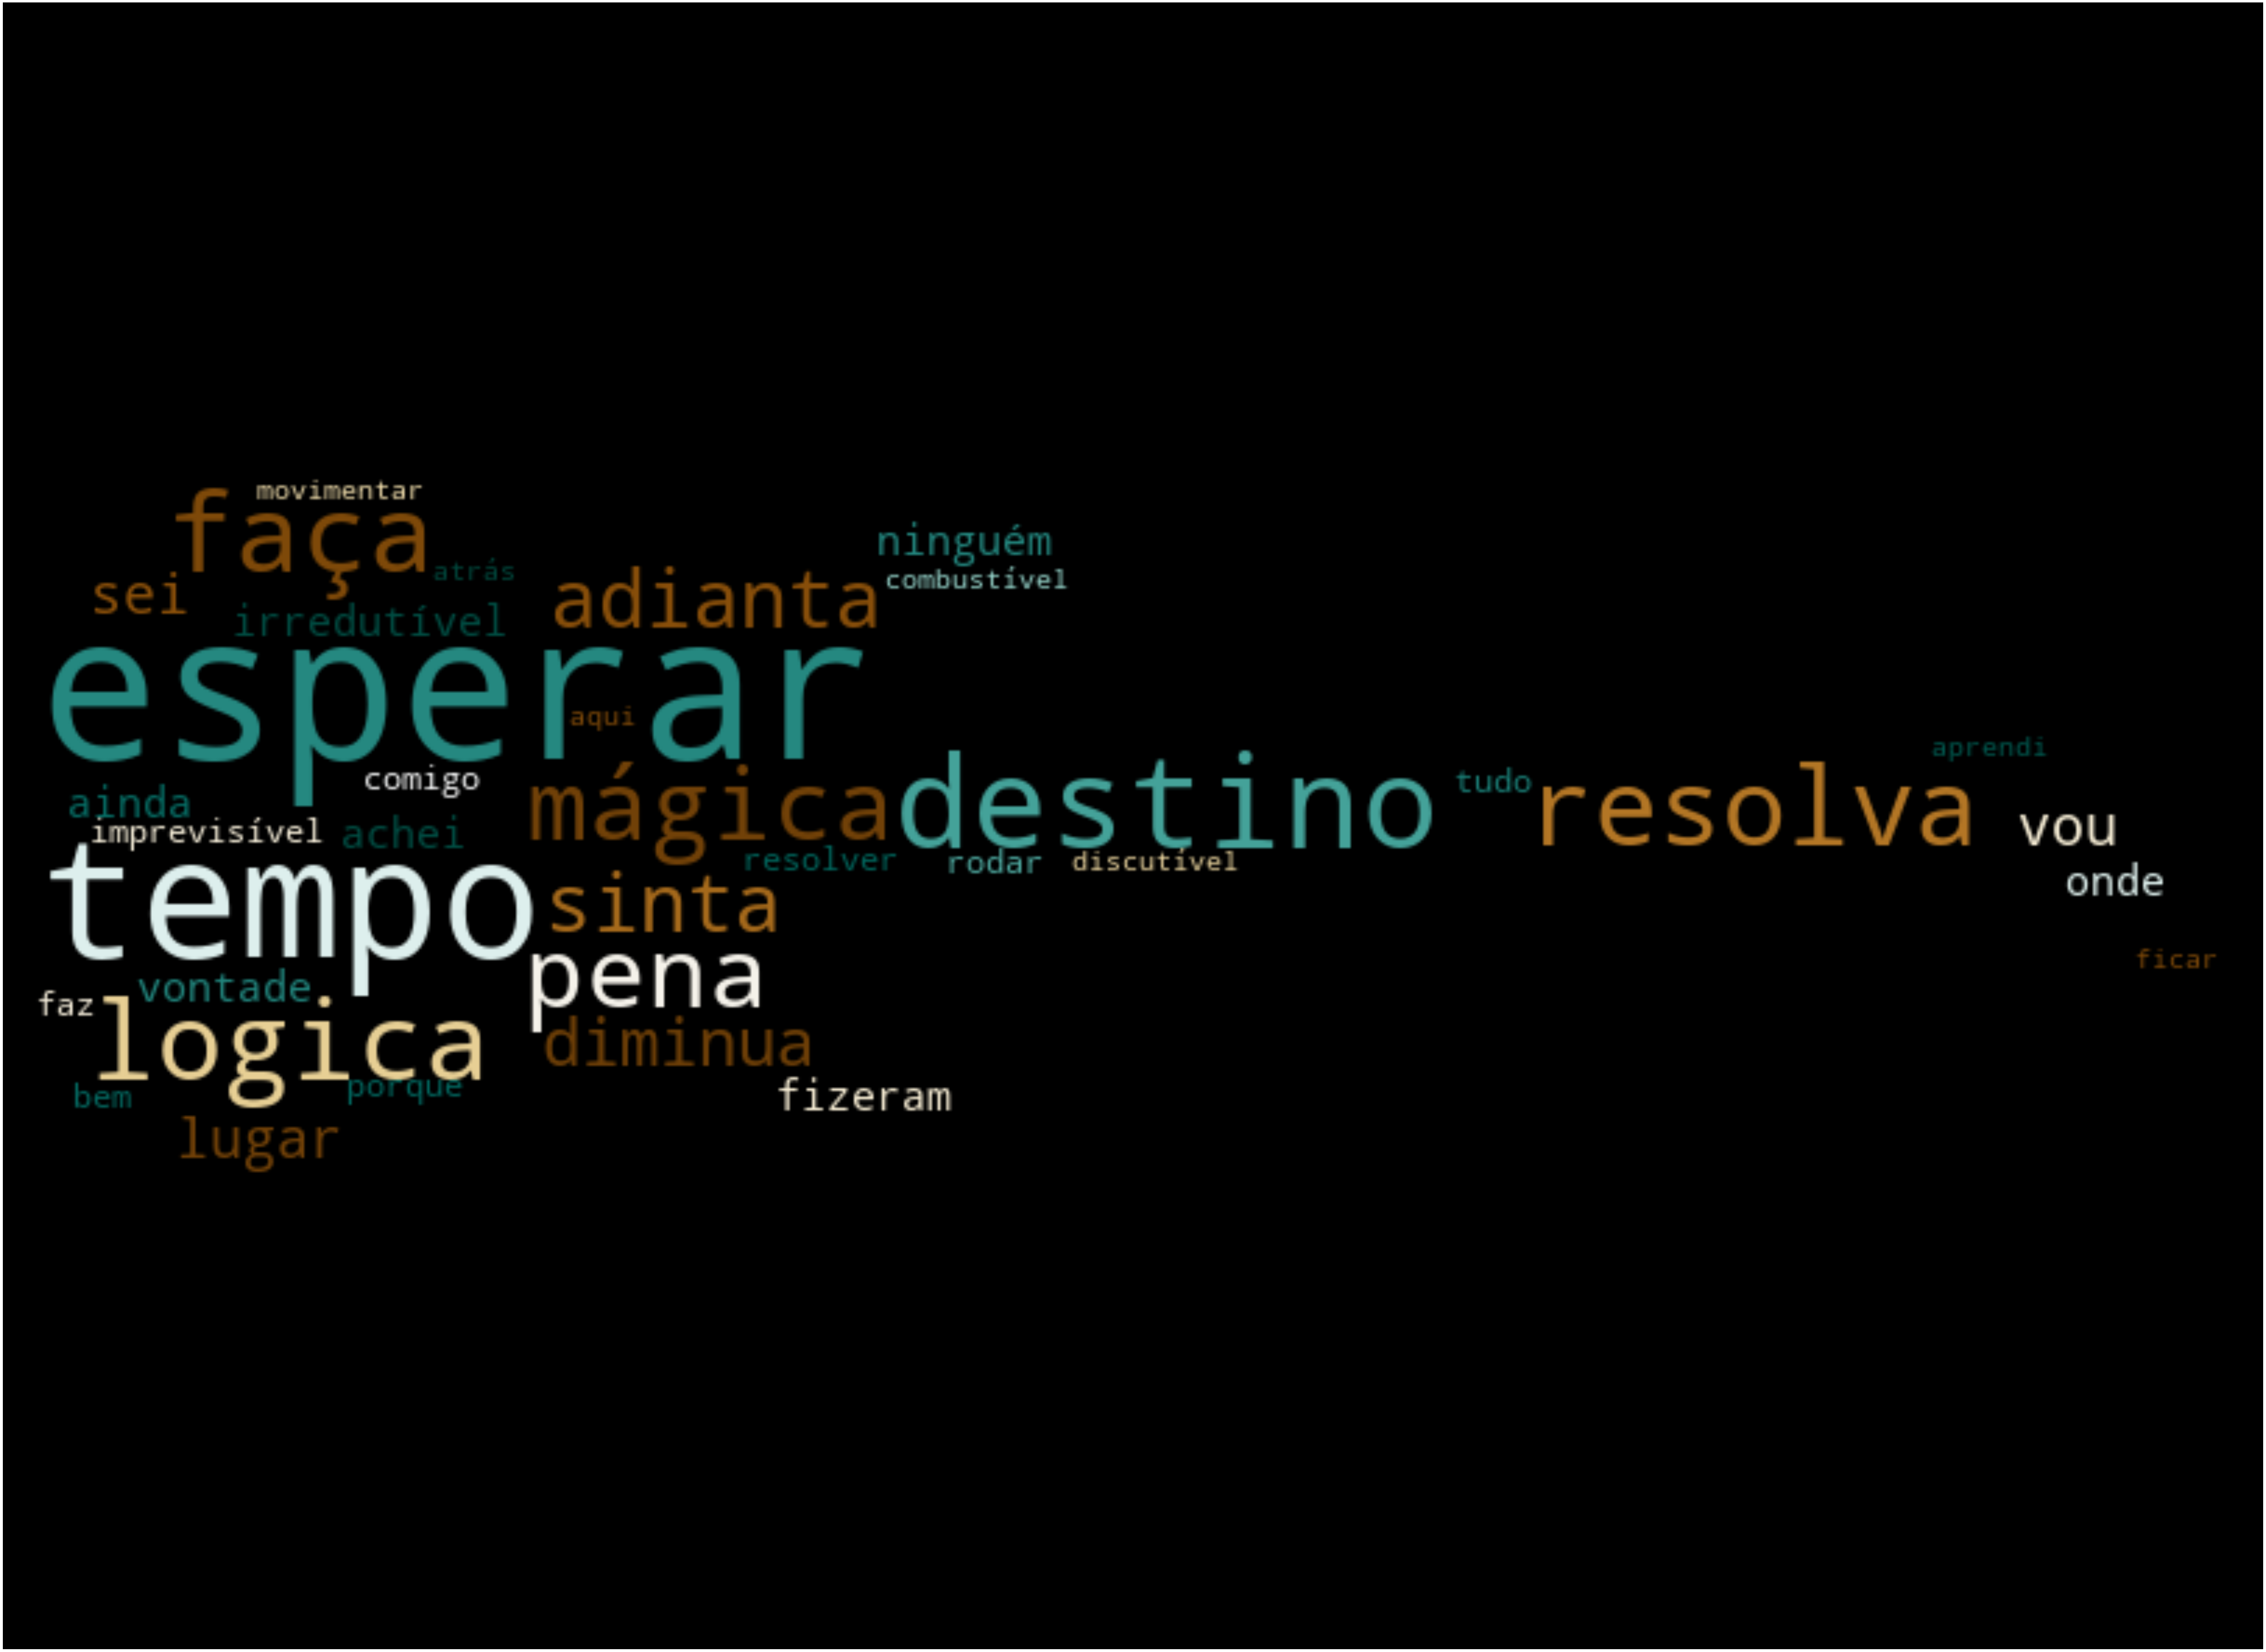

In [14]:
mask = np.array(Image.open("guitarra2.jpg"))
wordcloud3 = WordCloud(max_font_size=5000, background_color="black", mask=mask,colormap='BrBG').fit_words(df_enfrente['enfrente'].value_counts())
plt.figure(figsize=(100,100))
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis('off')
image_colors = ImageColorGenerator(mask)
# store to file
#plt.savefig("enfrente_guitarra3.png", format="png")
plt.show()

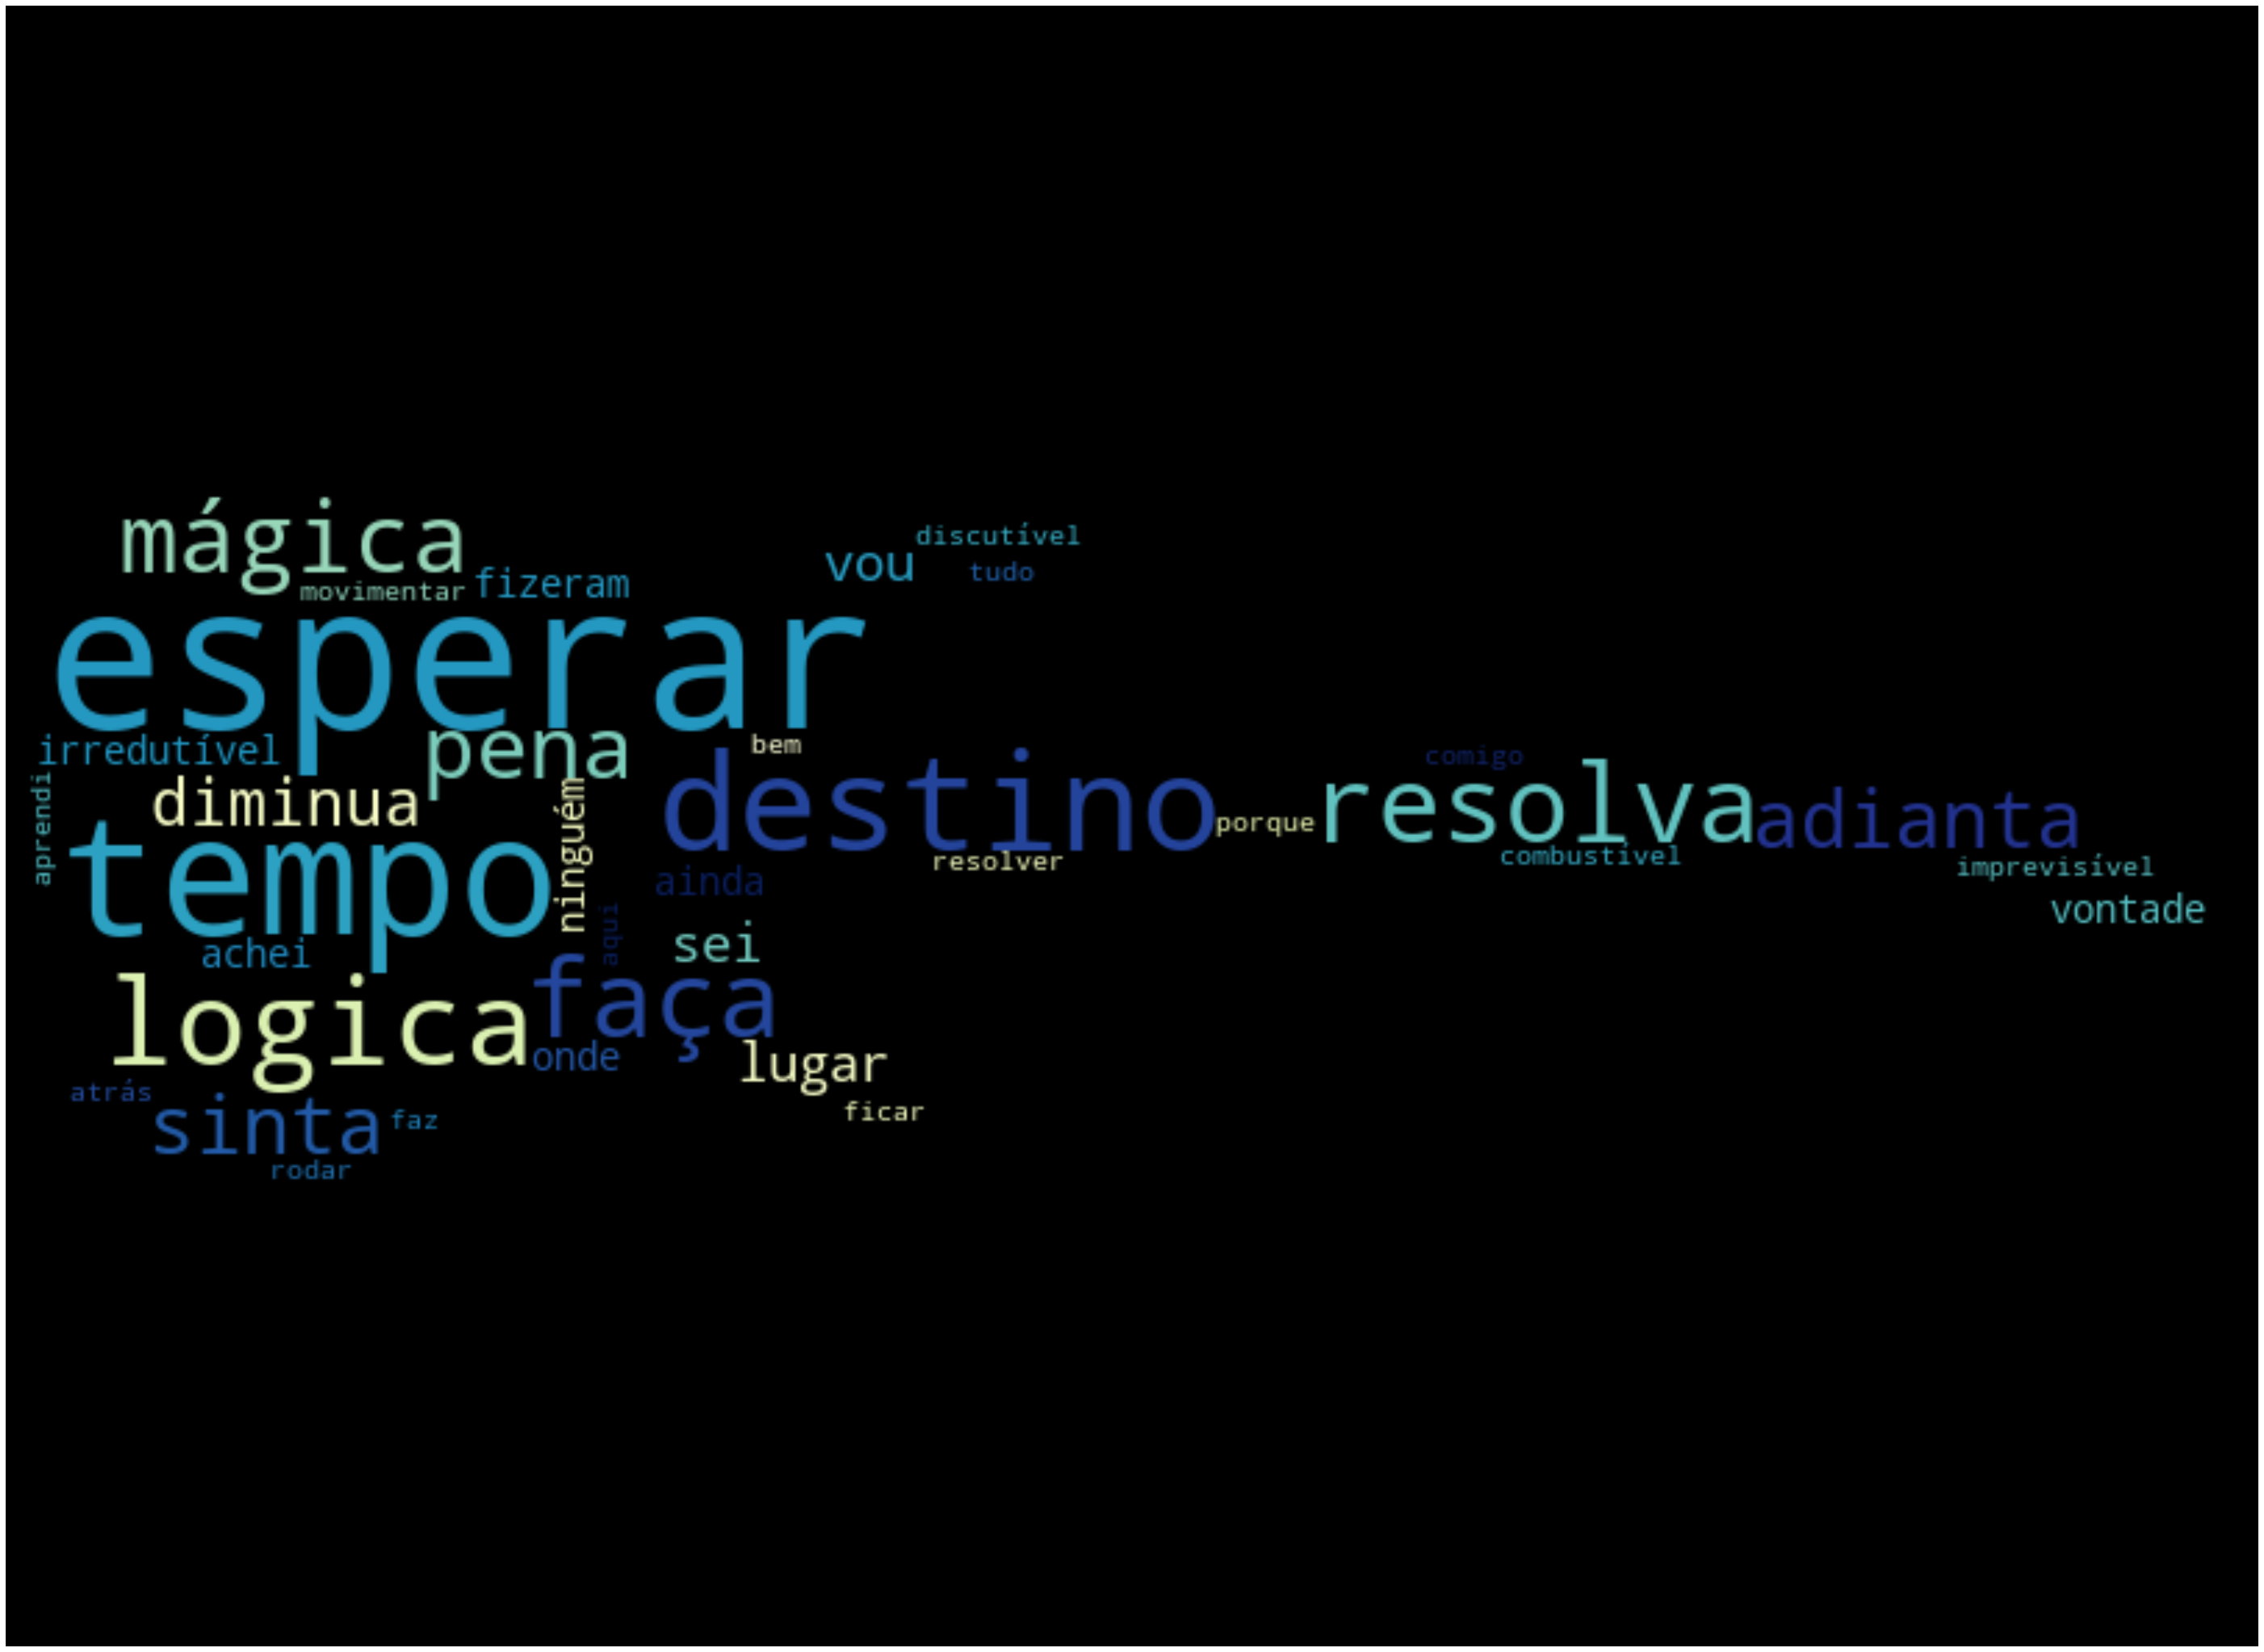

In [15]:
mask = np.array(Image.open("guitarra2.jpg"))
wordcloud4 = WordCloud(max_font_size=500, background_color="black", mask=mask,colormap='YlGnBu').fit_words(df_enfrente['enfrente'].value_counts())
plt.figure(figsize=(50,50))
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis('off')
image_colors = ImageColorGenerator(mask)
# store to file
#plt.savefig("enfrente_guitarra4.png", format="png")
plt.show()

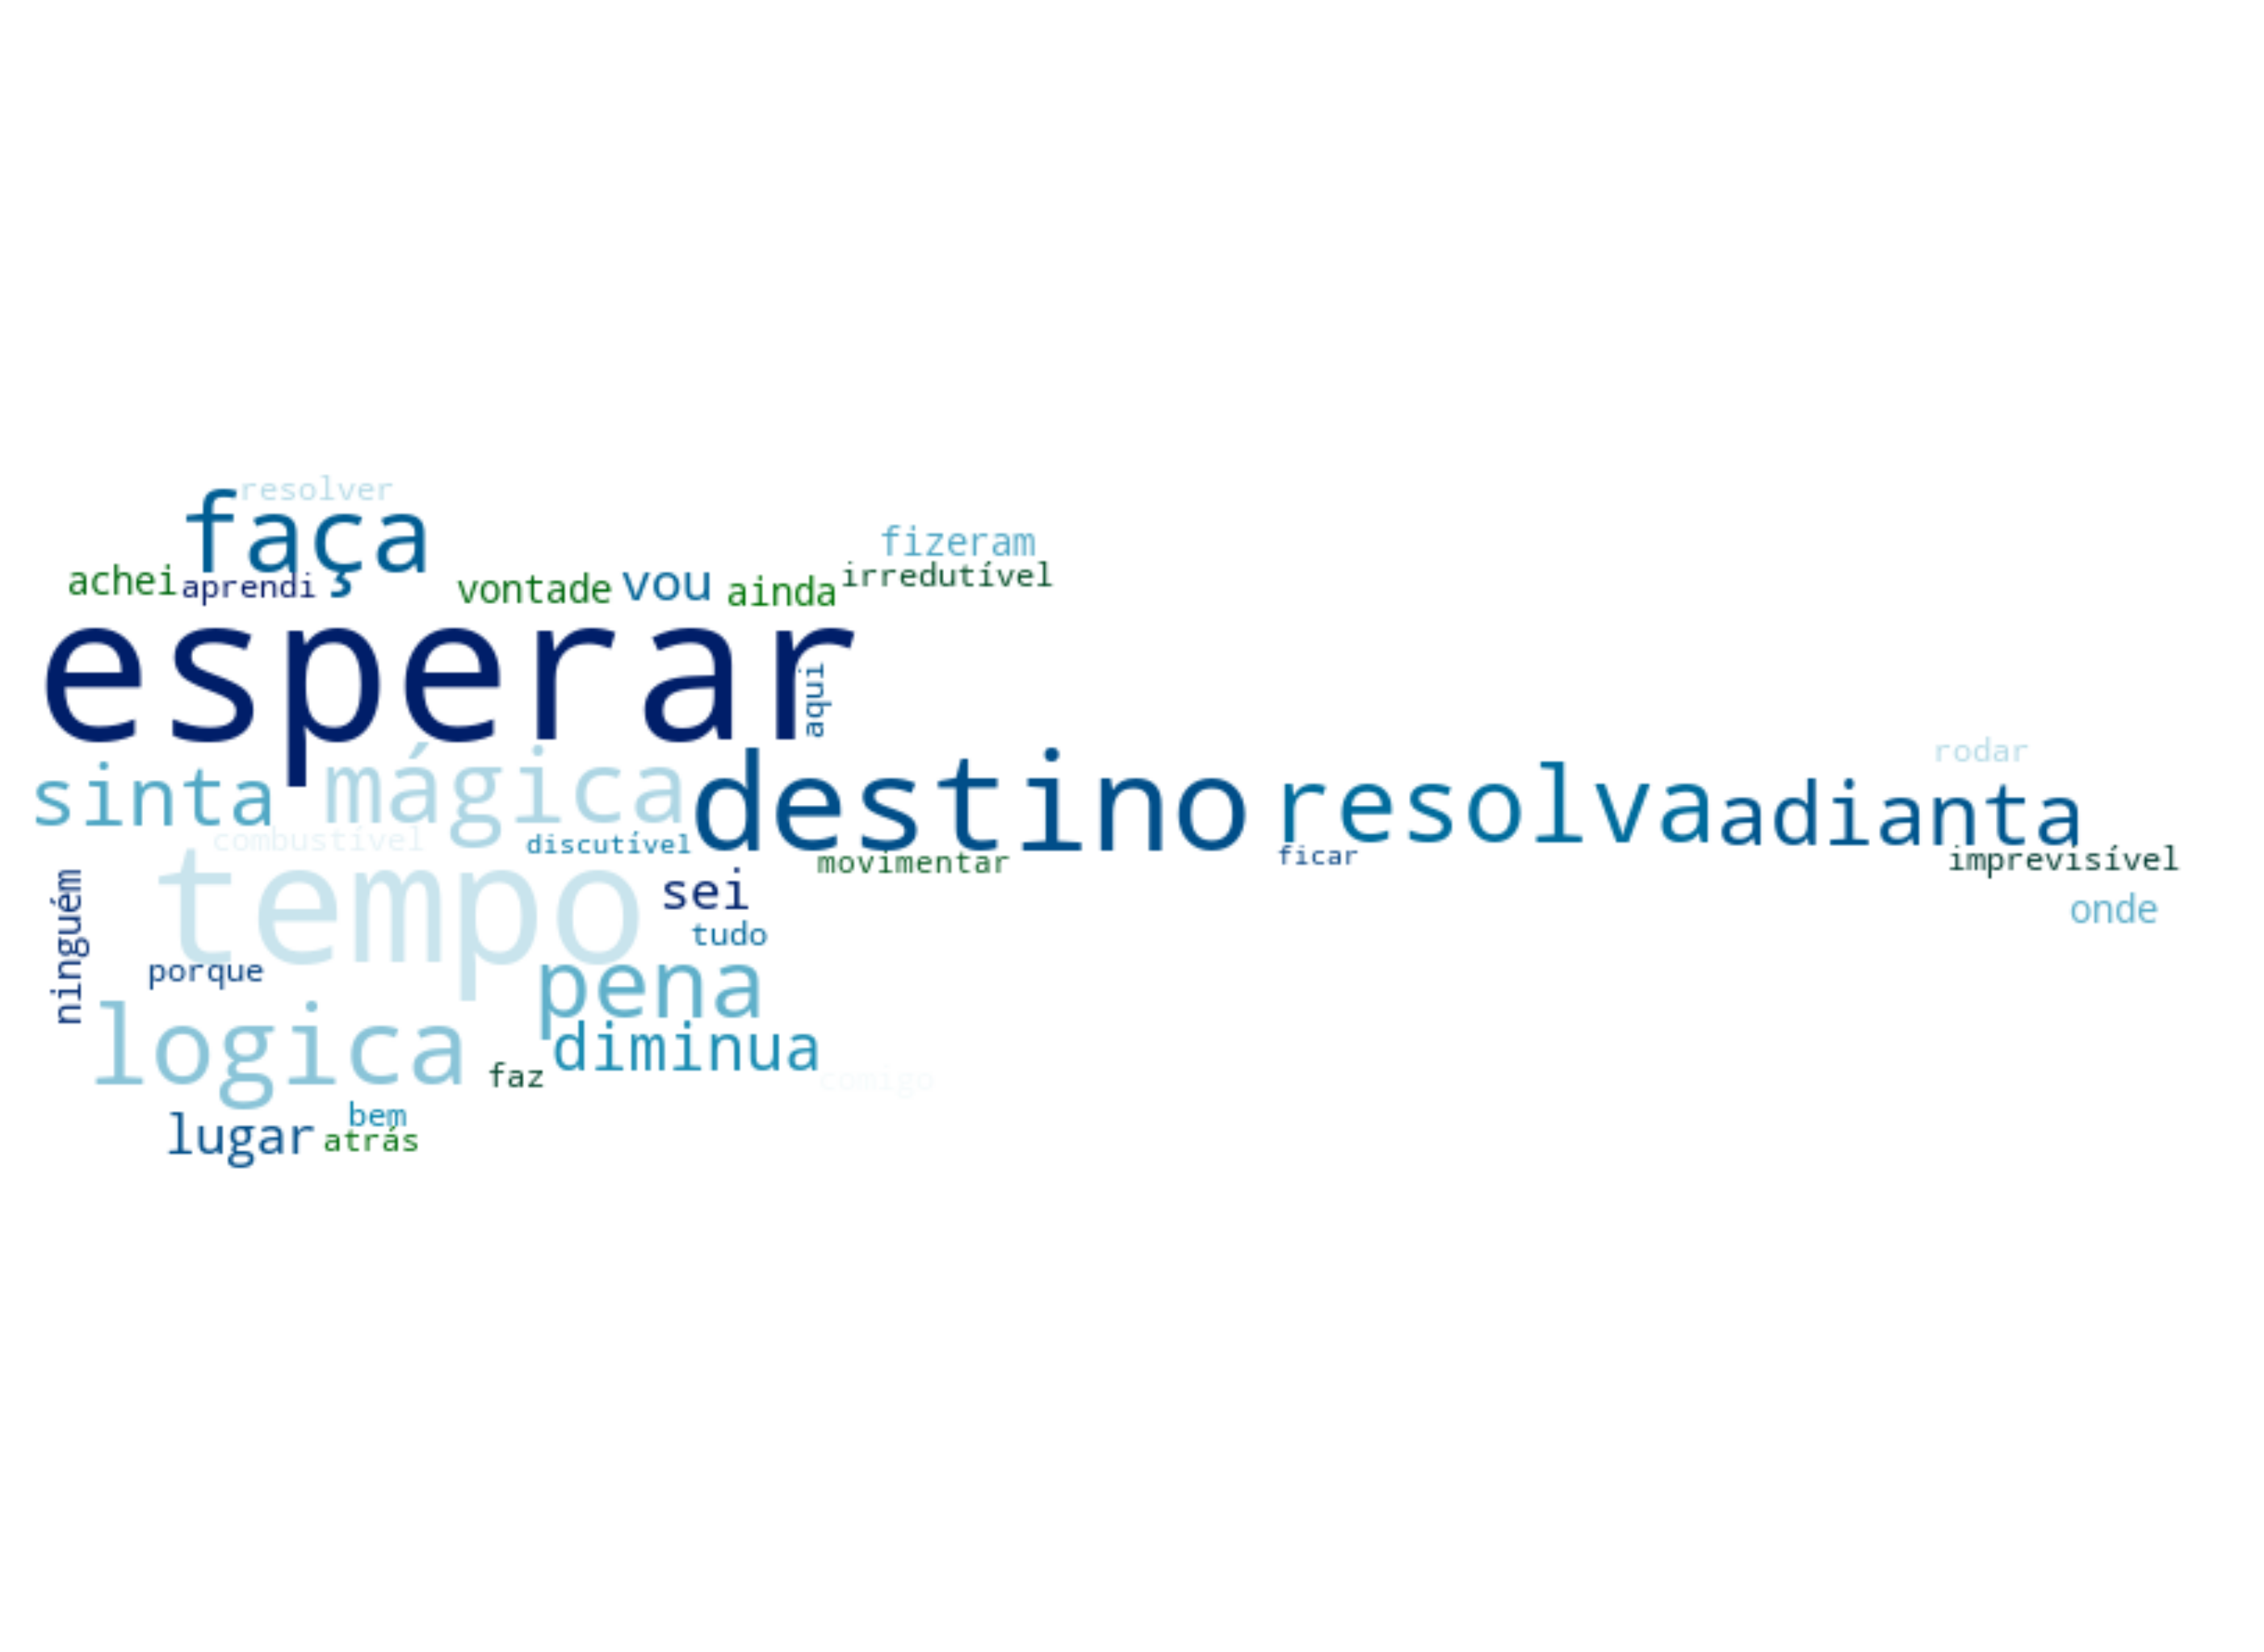

In [16]:
mask = np.array(Image.open("guitarra2.jpg"))
wordcloud5 = WordCloud(max_font_size=500, background_color="white", mask=mask,colormap='ocean').fit_words(df_enfrente['enfrente'].value_counts())
plt.figure(figsize=(50,50))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis('off')
image_colors = ImageColorGenerator(mask)
# store to file
#plt.savefig("enfrente_guitarra5.png", format="png")
plt.show()